In [83]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
# import sympy as sp
from scipy import optimize
from matplotlib.backends.backend_pdf import PdfPages
from scipy.misc import derivative as d
import adaptive
%matplotlib notebook

In [88]:
N = 100
u = np.linspace(-5,5,N)
v = np.linspace(-5,5,N)
u,v = np.meshgrid(u,v,indexing='ij')
x = u + 1j * v
r = np.exp(-1j*(0)) # angular part of lambda
lam = 1 * r
z = lam * x**3

In [89]:
def Ifun(x,lam):
    return 1j * lam * ((x**3)/3 - x)
def ReIm(x):
    return (x.real,x.imag)

In [90]:
I = Ifun(x,lam)

In [91]:
d(Ifun,x0=0.1,dx=1e-6,args=[lam])

-0.9899999999993248j

In [93]:
# critical pts are 0 of the gradient
# p0 = optimize.root(lambda x: d(Ifun,x0=x,dx=1e-6,args=[lam]), x0=-4, x1=1j).root
# p1 = optimize.root(lambda x: d(Ifun,x0=x,dx=1e-6,args=[lam]), x0=3, x1=-2j).root
# p0 = optimize.root(lambda x: d(Ifun,x0=x,dx=1e-6,args=[lam]), x0=-4).root
# p1 = optimize.root(lambda x: d(Ifun,x0=x,dx=1e-6,args=[lam]), x0=3).root
# if Ifun(p0,lam).real < Ifun(p1,lam).real:
#     p0,p1 = p1,p0
p0 = -1
p1 = 1

<IPython.core.display.Javascript object>


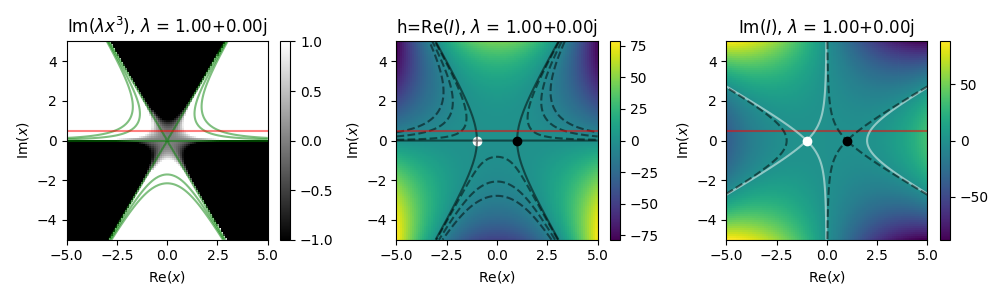

In [94]:
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.tight_layout()

plt.subplot(132)
plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,I.real)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.scatter(*ReIm(p0),color='w')
plt.scatter(*ReIm(p1),color='k')

plt.subplot(133)
plt.title('Im($I$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,I.imag)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
# higher critical pt and its contour
plt.scatter(*ReIm(p0),color='w')
plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
#lower critical pt and its contour
plt.scatter(*ReIm(p1),color='k')
plt.contour(u,v,I.imag,[Ifun(p1,lam).imag],linestyle='dashed',colors='k',alpha=0.5)
plt.tight_layout()


In [338]:
# %%capture
# thetas = np.linspace(0,2*np.pi,100)
# with PdfPages('airy_thimbles.pdf') as pdf:
#     for theta in thetas:
#         r = np.exp(-1j*theta)
#         l = 1* r
#         z = l * x**3
#         I = 1j * l * ((x**3)/3 - x)

#         plt.figure(figsize=(10,3))

#         plt.subplot(131)
#         plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(l))
#         plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
#         plt.xlabel('Re($x$)')
#         plt.ylabel('Im($x$)')
#         plt.colorbar()
#         plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
#         plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
#         plt.tight_layout()

#         plt.subplot(132)
#         plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(l))
#         plt.pcolormesh(u,v,I.real)
#         plt.xlabel('Re($x$)')
#         plt.ylabel('Im($x$)')
#         plt.colorbar()
#         plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
#         plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
#         plt.scatter(-1,0,color='w')
#         plt.scatter(1,0,color='k')

#         plt.subplot(133)
#         plt.title('Im($I$), $\lambda$ = {:.2f}'.format(l))
#         plt.pcolormesh(u,v,I.imag)
#         plt.xlabel('Re($x$)')
#         plt.ylabel('Im($x$)')
#         plt.colorbar()
#         plt.contour(u,v,I.imag,np.sort([-2*l.real/3,2*l.real/3,0]),linestyle='dashed',colors='k',alpha=0.5)
#         plt.contour(u,v,I.imag,np.sort([2*l.real/3]),linestyle='dashed',colors='w',alpha=0.5)
#         plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
#         # plt.scatter([1,-1],[0,0],color='b')
#         plt.scatter(-1,0,color='w')
#         plt.scatter(1,0,color='k')
#         plt.tight_layout()
#         pdf.savefig()

In [115]:
# dx = 0.01
# line = np.arange(-5,5,dx,dtype=np.complex) + 0.5j
# def gradIm(x,lam):
#     grad = d(h,x0=x,dx=1e-6*1j,args=[lam])
#     return grad
# def pushIm(x, dx):
#     return x+dx*gradIm(x,lam)
# def subdivide(line):
#     dist_pts = np.abs(np.diff(line))
#     line[dist_pts > 0.0015]

In [116]:
# for i in range(200):
#     line = pushIm(line,0.01)

In [117]:
# plt.figure()
# plt.plot(line.real,line.imag)

In [118]:
# def h_pt(v,u,lam):
# #     u,v = ReIm(x)
#     return Ifun(u+1j*v,lam).real

In [119]:
# for i in range(line.size):
# #     print(line[i])
#     line[i] = line[i].real + 1j * optimize.minimize(h_pt,x0=line[i].imag,method='SLSQP',args=(line[i].real,lam)).x

In [120]:
# plt.figure(figsize=(10,3))

# plt.subplot(131)
# plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(lam))
# plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
# plt.xlabel('Re($x$)')
# plt.ylabel('Im($x$)')
# plt.colorbar()
# plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
# plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
# plt.tight_layout()

# plt.subplot(132)
# plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(lam))
# plt.pcolormesh(u,v,I.real)
# plt.xlabel('Re($x$)')
# plt.ylabel('Im($x$)')
# plt.colorbar()
# plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
# plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
# plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
# plt.scatter(*ReIm(p0),color='w')
# plt.scatter(*ReIm(p1),color='k')

# plt.subplot(133)
# plt.title('Im($I$), $\lambda$ = {:.2f}'.format(lam))
# plt.pcolormesh(u,v,I.imag)
# plt.xlabel('Re($x$)')
# plt.ylabel('Im($x$)')
# plt.colorbar()
# plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
# # higher critical pt and its contour
# plt.scatter(*ReIm(p0),color='w')
# plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
# #lower critical pt and its contour
# plt.scatter(*ReIm(p1),color='k')
# plt.contour(u,v,I.imag,[Ifun(p1,lam).imag],linestyle='dashed',colors='k',alpha=0.5)
# plt.plot(line.real,line.imag)
# plt.xlim(-5,5)
# plt.ylim(-5,5)
# plt.tight_layout()

In [101]:
dx = 0.01
line = r**(1/3)*(np.arange(-5,5,dx,dtype=np.complex) + 0.5j)
def h(x,lam):
    return Ifun(x,lam).real
def gradh(x,lam):
#     u,v = ReIm(x)
    gradRe = -d(h,x0=x,dx=1e-6,args=[lam])
    gradIm = d(h,x0=x,dx=1e-6*1j,args=[lam])
    return gradRe.real+1j*gradIm.imag
def push_no_cnstr(x,dx):
    return x+dx*gradh(x,lam)#(gradh(x,lam)*linedir.conj()).real
def subdivide(line,start,end):
    from scipy.interpolate import interp1d
    interp = interp1d(line.real,line.imag)
    line = np.linspace(linestart,lineend,line.size)
    return line+1j*interp(line)
def subdivide_adaptive(line,start,end):
    from scipy.interpolate import interp1d
    interp = interp1d(line.real,line.imag)
    learner = adaptive.Learner1D(interp, bounds=(linestart, lineend))
    runner = adaptive.Runner(learner, goal=lambda l: l.loss() < 0.01)
    line = np.linspace(linestart,lineend,line.size)
    return line+1j*interp(line)

In [103]:
dx = 0.01
line = r**(1/3)*(np.arange(-5,5,dx,dtype=np.complex) + 0.5j)
linestart = line[0].real
lineend = line[-1].real
for i in range(300):
#     print(i)
    line = push_no_cnstr(line,0.01)
    line = subdivide(line,linestart,lineend)
#     line = subdivide(line,linestart,lineend)

<IPython.core.display.Javascript object>


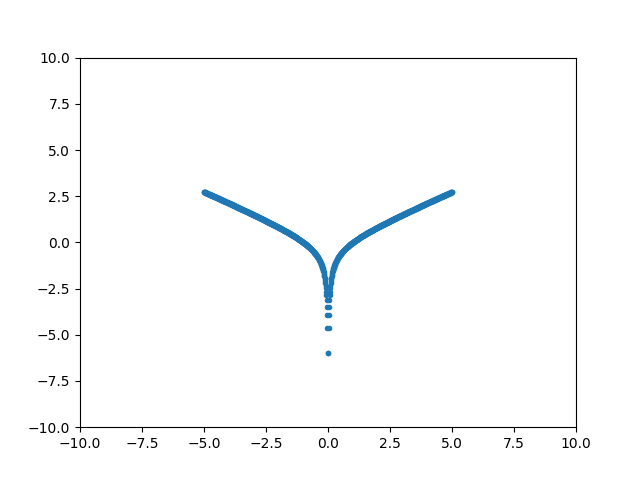

(-10, 10)

In [104]:
plt.figure()
plt.plot(line.real,line.imag,'.')
plt.xlim(-10,10)
plt.ylim(-10,10)

<IPython.core.display.Javascript object>


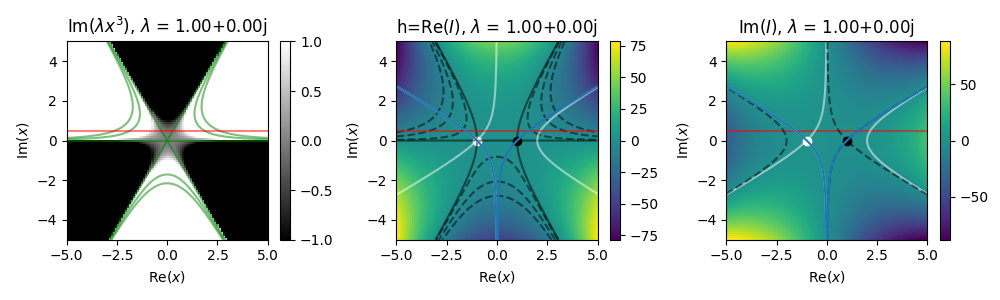

In [105]:
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.title('Im($\lambda x^3$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,z.imag,vmin=-1,vmax=1,cmap='gist_gray')
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,z.imag,[0,5,10],linestyle='dashed',colors='g',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.tight_layout()

plt.subplot(132)
plt.title('h=Re($I$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,I.real)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,I.real,[-10,-5,-1,0],linestyle='dashed',colors='k',alpha=0.5)
plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',alpha=0.5)
plt.scatter(*ReIm(p0),color='w')
plt.scatter(*ReIm(p1),color='k')
plt.plot(line.real,line.imag)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(133)
plt.title('Im($I$), $\lambda$ = {:.2f}'.format(lam))
plt.pcolormesh(u,v,I.imag)
plt.xlabel('Re($x$)')
plt.ylabel('Im($x$)')
plt.colorbar()
plt.contour(u,v,(r**(1/3)*(x-0.5j)).imag,[0],colors='r',linestyle='dashed',alpha=0.5)
# higher critical pt and its contour
plt.scatter(*ReIm(p0),color='w')
plt.contour(u,v,I.imag,[Ifun(p0,lam).imag],linestyle='dashed',colors='w',alpha=0.5)
#lower critical pt and its contour
plt.scatter(*ReIm(p1),color='k')
plt.contour(u,v,I.imag,[Ifun(p1,lam).imag],linestyle='dashed',colors='k',alpha=0.5)
plt.plot(line.real,line.imag)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.tight_layout()

In [121]:
# #push perp to current line, doesn't work
# def push(x,dx,direction):
#     gradperp = gradh(x,lam) - (gradh(x,lam)*direction.conj()).real * direction/(direction.real**2+direction.imag**2)
#     return x+dx*(gradperp)#(gradh(x,lam)*linedir.conj()).real

In [122]:
# dx = 0.01
# line = np.arange(-5,5,dx,dtype=np.complex) + 0.5j
# for i in range(10):
# #     loc = np.concatenate( ([0],np.cumsum(np.abs(np.diff(line)) )) )
# #     print(loc)
#     gradl = np.gradient(line)
#     line = push(line,0.01,gradl)

In [123]:
# plt.figure()
# plt.plot(line.real,line.imag,'.')
# plt.ylim(-10,10)
# plt.xlim(-10,10)